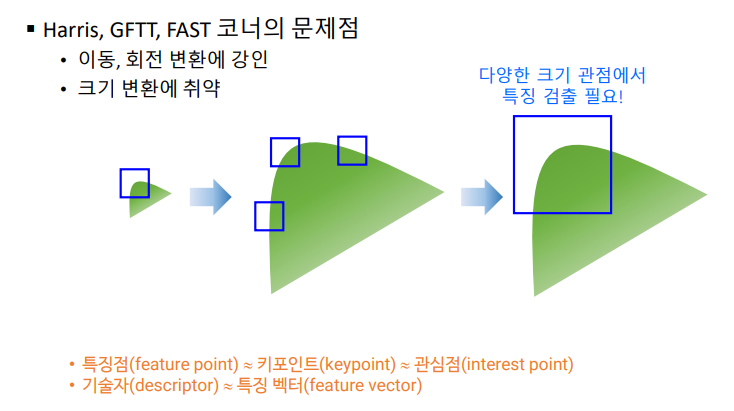
기존 Harris, GFTT, FAST는 코너검출에서 크기변환에 취약점이 있었습니다. 그래서 큰 관점에서 볼 필요가 있습니다.

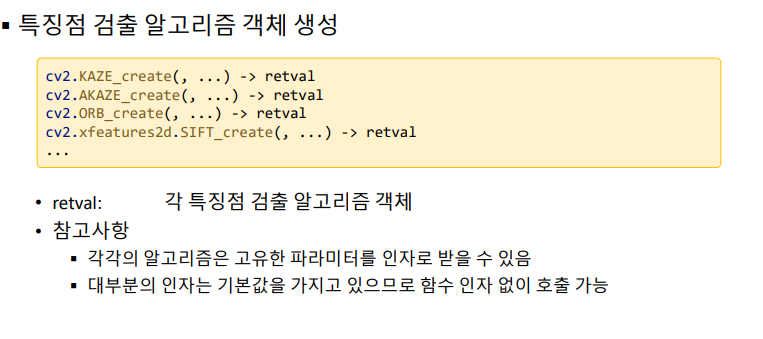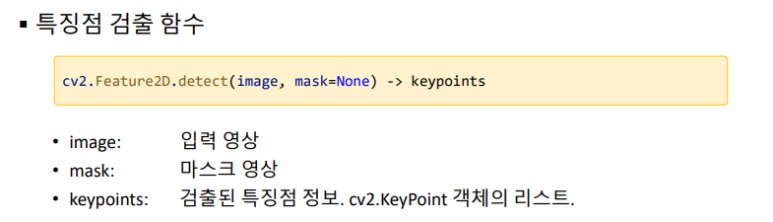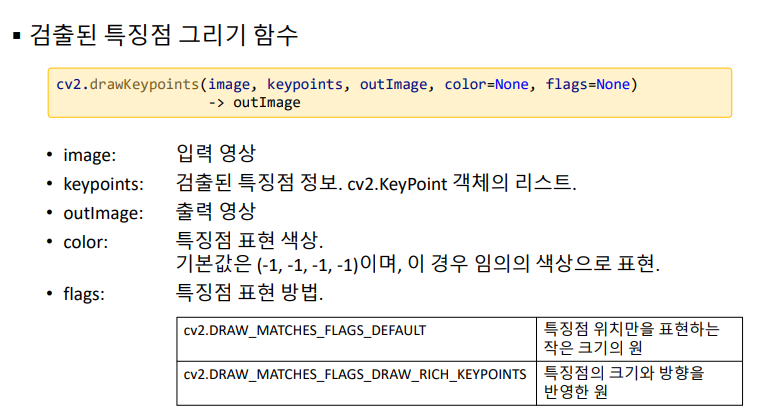

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

!pip install opencv-python

두 사진은 같은 사진이나 촬영한 각도가 다릅니다. 이 두 사진 각각 특징점을 추출할 것입니다.

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x198dd645d60>)

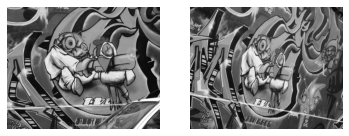

In [13]:
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)

src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(121),plt.axis('off'),plt.imshow(src1,cmap='gray')
plt.subplot(122),plt.axis('off'),plt.imshow(src2,cmap='gray')

In [3]:
if src1 is None or src2 is None:

    print('Image load failed!')

    sys.exit()

특징점 알고리즘 객체를 생성합니다.
- KAZE : 방향 성분이 없습니다.
- AKAZE : 방향 성분이 있습니다.
- ORB : FAST를 써서 굉장히 빠르며 방향성분이 있습니다.

이렇게 세 종류가 있으며 각각 주석을 풀며 서로다른 결과를 확인해 보세요

In [4]:
#feature = cv2.KAZE_create() 
feature = cv2.AKAZE_create() #방향성분 있음
#feature = cv2.ORB_create() 

특징점을 검출해 보고 각각의 개수를 확인해 보겠습니다.

In [6]:
kp1 = feature.detect(src1)

kp2 = feature.detect(src2)

print('# of kp1:', len(kp1))

print('# of kp2:', len(kp2))

# of kp1: 2418
# of kp2: 2884


In [7]:
dst1 = cv2.drawKeypoints(src1, kp1, None,

                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

                         #kp1을 각각 인자로 넣어준다.

dst2 = cv2.drawKeypoints(src2, kp2, None,

                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x198dcff5df0>)

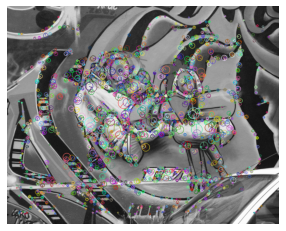

In [9]:
plt.axis('off'),plt.imshow(dst1)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x198dd393eb0>)

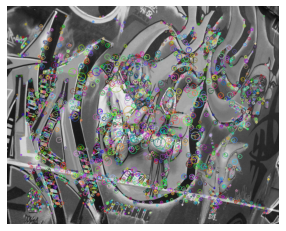

In [11]:
plt.axis('off'),plt.imshow(dst2)